<a href="https://colab.research.google.com/github/SiyuFang/STAT6289/blob/master/Final_Project_Report_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dog Breed Identification Using CNN**
team member: Siyu Fang, Hongjin Ren

# Introduction

  For this project, we decide to work on the kaggle competition [Dog Breed Identification](https://www.kaggle.com/c/dog-breed-identification/overview). The dataset of this competition is designed based on the dataset [stanford_dogs](https://www.tensorflow.org/datasets/catalog/stanford_dogs). Comparing to the Stanford_dog, We can see they increased the images of dogs in this kaggle dataset. 

  The data of this competition includes four files: train.zip, test.zip, label.csv, and sample_submission.csv. Train.zip and test.zip are the training set and test set of images of dogs. Each image has a filename that is its unique id. The dataset comprises 120 breeds of dogs. Each breeds has limited number of training images. The train.zip includes 10222 images, and the test.zip includes 10357 images. And the total is 20579 dog pictures with 120 breeds. The label.csv contains column id and breed, the file has all 10222 unique ids for breeds of dogs in the train set. The sample_submission file is a sample submission file in the correct format, and it contains the 10357 unique ids in the test set. 
  
  In this project, we try to build a convolutional neural network(CNN).Convolutional neural networks are used primarily to classify images, cluster them by similarity, and perform object recognition within scenes. They are algorithms that can identify faces, individuals, fruits and many other aspects of visual data. So we decided to work on the CNN when we see the topic of this kaggle competition. But because Google Colab crashed when we deal with 120 breeds of dogs, we decide to count the number of images for each breeds, and choose the top 60 breeds with most images to deal with. So we only use 5720 images in the training set.

  Basically in this project, we will
1    Import libraries
2.   Load the data
3.   Split the data
4.   Build the CNN model
5.   Train the model
6.   Evaluation and conclusion






# Notebook Configuration


## Google drive

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/final_project/'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/code/utilities/p3_deep_learning/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [ ]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/code/utilities/p3_deep_learning


## Loading the data

In [ ]:
import pandas as pd
data_dir = abspath_curr+'/dog-breed-identification'
labels = pd.read_csv(data_dir+ '/labels.csv')
sample_submission = pd.read_csv(data_dir+'/sample_submission.csv')
train=data_dir+'/train'
test=data_dir+'/test'

#Adding path of the dog image to its id and breed
label=labels.assign(path=lambda x: train + x['id'] +'.jpg')
label.head()

,id,breed,path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,/content/drive/My Drive/Colab Notebooks/teachi...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,/content/drive/My Drive/Colab Notebooks/teachi...
2,001cdf01b096e06d78e9e5112d419397,pekinese,/content/drive/My Drive/Colab Notebooks/teachi...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,/content/drive/My Drive/Colab Notebooks/teachi...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,/content/drive/My Drive/Colab Notebooks/teachi...


## Getting the name of the target

In [ ]:
targets = label.breed.values

## Getting the info

In [ ]:
import os
from os import listdir

os.listdir(data_dir)

['labels.csv', 'sample_submission.csv', 'test', 'train']

In [ ]:
print("Number training examples files: " + str(len(listdir(train))) + " | Number training examples labels: "
      + str(len(labels)))
print("Number test examples files: " + str(len(listdir(test))) + " | Numer test examples predictions: " 
     + str(len(sample_submission)))

Number training examples files: 10222 | Number training examples labels: 10222
Number test examples files: 10357 | Numer test examples predictions: 10357


In [ ]:
# Get the classes
classes = label.breed.value_counts()

# Print the classes
classes

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

In [ ]:
#Checking number of different dog breeds (number of classes)
label["breed"].nunique()

120

In [ ]:
top_60=list(labels.breed.value_counts()[0:60].index)
top_60

['scottish_deerhound',
 'maltese_dog',
 'afghan_hound',
 'entlebucher',
 'bernese_mountain_dog',
 'shih-tzu',
 'pomeranian',
 'great_pyrenees',
 'basenji',
 'samoyed',
 'tibetan_terrier',
 'airedale',
 'cairn',
 'leonberg',
 'beagle',
 'japanese_spaniel',
 'miniature_pinscher',
 'australian_terrier',
 'blenheim_spaniel',
 'irish_wolfhound',
 'saluki',
 'lakeland_terrier',
 'papillon',
 'norwegian_elkhound',
 'siberian_husky',
 'whippet',
 'pug',
 'chow',
 'pembroke',
 'italian_greyhound',
 'ibizan_hound',
 'border_terrier',
 'newfoundland',
 'silky_terrier',
 'lhasa',
 'dandie_dinmont',
 'bedlington_terrier',
 'sealyham_terrier',
 'irish_setter',
 'rhodesian_ridgeback',
 'boston_bull',
 'collie',
 'old_english_sheepdog',
 'kelpie',
 'english_foxhound',
 'schipperke',
 'bouvier_des_flandres',
 'african_hunting_dog',
 'bloodhound',
 'weimaraner',
 'bluetick',
 'saint_bernard',
 'labrador_retriever',
 'chesapeake_bay_retriever',
 'english_setter',
 'norfolk_terrier',
 'yorkshire_terrier',

## Choose only the top 60 breeds

In [ ]:
label60=labels[labels.breed.isin(top_60)]
label60.shape

(5720, 2)

## One-Hot Encoding
One-hot encoding is used for categorical variables that can not simply assign a natural ordered integer value to each unique category. one hot encoding is used to convert categorical data to integer data. We get dummy variables for each categories. For example, in the first row, boston_bull is 1 and other are 0 means the breed is boston bull in the row 0. 

In [ ]:
img_label=label60.breed
img_label=pd.get_dummies(label60.breed)
one_hot_labels = np.asarray(img_label)
img_label.head()

,afghan_hound,african_hunting_dog,airedale,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,blenheim_spaniel,bloodhound,bluetick,border_terrier,boston_bull,bouvier_des_flandres,cairn,chesapeake_bay_retriever,chow,collie,dandie_dinmont,english_foxhound,english_setter,entlebucher,great_pyrenees,greater_swiss_mountain_dog,ibizan_hound,irish_setter,irish_wolfhound,italian_greyhound,japanese_spaniel,kelpie,kerry_blue_terrier,labrador_retriever,lakeland_terrier,leonberg,lhasa,maltese_dog,miniature_pinscher,newfoundland,norfolk_terrier,norwegian_elkhound,old_english_sheepdog,papillon,pembroke,pomeranian,pug,rhodesian_ridgeback,saint_bernard,saluki,samoyed,schipperke,scottish_deerhound,sealyham_terrier,shih-tzu,siberian_husky,silky_terrier,tibetan_terrier,weimaraner,whippet,yorkshire_terrier
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Getting the training, validation and test data

### Loop the procedure through the train folder, and keep adding each new image data into the existing data frame

In [ ]:
#resize the image
img_rows=128
img_cols=128

In [ ]:
#tqdm shows a progress bar for loop
from tqdm import tqdm
import cv2

x_feature = []
y_feature = []

i = 0 # initialization
for f, img in tqdm(label60.values): # f for format ,jpg
    train_img = cv2.imread(train+'/{}.jpg'.format(f))
    label = one_hot_labels[i]
    train_img_resize = cv2.resize(train_img, (img_rows, img_cols)) 
    x_feature.append(train_img_resize)
    y_feature.append(label)
    i += 1

100%|██████████| 5720/5720 [45:44<00:00,  2.08it/s]


## Change the data frame to form of arrays and normalize it. 

In [ ]:
x_train_data = np.array(x_feature, np.float32) / 255.   # /= 255 for normalization
print (x_train_data.shape)

(5720, 128, 128, 3)


In [ ]:
y_train_data = np.array(y_feature, np.uint8)
print (y_train_data.shape)

(5720, 60)


## Spliting the training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

# We split images into training (80%) and validation (20%)
x_train, x_val, y_train, y_val = train_test_split(x_train_data, y_train_data, test_size=0.2, random_state=2)
print (x_train.shape)
print (x_val.shape)

(4576, 128, 128, 3)
(1144, 128, 128, 3)


## ImageDataGenerator for real-time data augmentation


Using augmentation we can add the images in the dataset by considering rotation

In [ ]:
from keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
training_set=train_datagen.flow(x_train,y=y_train,batch_size=32)
validation_set=test_datagen.flow(x_val,y=y_val,batch_size=32)

# Training

### Creating the directory for the model

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the architecture of the model

In [ ]:
# Add the pretrained layers
pretrained_model = keras.applications.ResNet50(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
output = keras.layers.Dense(60, activation='softmax')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

## Freezing the pretrained layers

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

## Setting Callbacks

In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

## Compiling the model
Here we use the default learning rate of Adam optimizer.

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',    
              metrics=['accuracy'])

## Training the model

In [ ]:
# Train, evaluate and save the best model
history = model.fit(training_set,
                    epochs=10 ,
                    validation_data=(validation_set),
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/10
143/143 [==============================] - 216s 2s/step - loss: 4.3206 - accuracy: 0.0155 - val_loss: 4.2085 - val_accuracy: 0.0219
Epoch 2/10
143/143 [==============================] - 213s 1s/step - loss: 4.2935 - accuracy: 0.0168 - val_loss: 4.2812 - val_accuracy: 0.0227
Epoch 3/10
143/143 [==============================] - 217s 2s/step - loss: 4.1318 - accuracy: 0.0157 - val_loss: 4.1142 - val_accuracy: 0.0271
Epoch 4/10
143/143 [==============================] - 220s 2s/step - loss: 4.1095 - accuracy: 0.0197 - val_loss: 4.1127 - val_accuracy: 0.0140
Epoch 5/10
143/143 [==============================] - 217s 2s/step - loss: 4.1161 - accuracy: 0.0170 - val_loss: 4.1112 - val_accuracy: 0.0157
Epoch 6/10
143/143 [==============================] - 221s 2s/step - loss: 4.1119 - accuracy: 0.0232 - val_loss: 4.1051 - val_accuracy: 0.0166
Epoch 7/10
143/143 [==============================] - 218s 2s/step - loss: 4.1125 - accuracy: 0.0197 - val_loss: 4.0978 - val_accuracy: 0.0157

## Plotting the learning curve¶

### Creating the directory for the figure

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

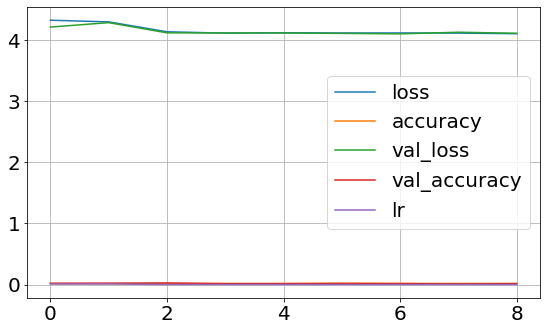

In [ ]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing.pdf')
plt.show()

## Unfreezing the pretrained layers

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

## Compiling the model

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the model
Because I run out of GPU, the run time is very long.

In [ ]:

# Train, evaluate and save the best model
history = model.fit(training_set,
                    epochs=10,
                    validation_data=validation_set,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/10
143/143 [==============================] - 1059s 7s/step - loss: 2.1087 - accuracy: 0.4349 - val_loss: 4.8152 - val_accuracy: 0.0210
Epoch 2/10
143/143 [==============================] - 1063s 7s/step - loss: 1.2398 - accuracy: 0.6449 - val_loss: 4.3659 - val_accuracy: 0.0149
Epoch 3/10
143/143 [==============================] - 1065s 7s/step - loss: 0.9131 - accuracy: 0.7295 - val_loss: 4.2857 - val_accuracy: 0.0210
Epoch 4/10
143/143 [==============================] - 1067s 7s/step - loss: 0.7254 - accuracy: 0.7819 - val_loss: 4.4734 - val_accuracy: 0.0105
Epoch 5/10
143/143 [==============================] - 1072s 7s/step - loss: 0.4867 - accuracy: 0.8660 - val_loss: 4.4168 - val_accuracy: 0.0105


## Plotting the learning curve¶

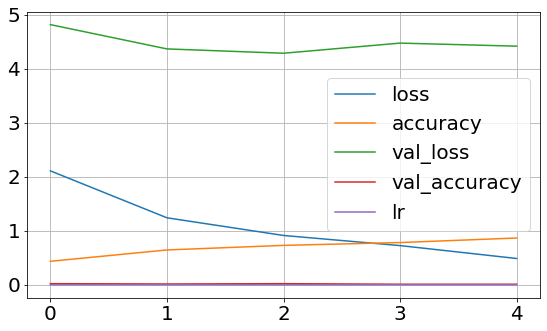

In [ ]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing.pdf')
plt.show()

## Loading the saved model

In [ ]:
# Load the saved model
model.load_weights(filepath=abspath_curr + '/result/model/model.h5')

# Conclusion

  We can see our model behave poorly. When we freeze the pretrained layers, the accuracy is almost 0%, it means our model's prediction almost no accuracy, and loss above 4 means our model behave poorly. And it stops after running 9 epochs, it may due to early stopping callback command. After we unfreeze the pretrained layers, I try to use learning rate equal to 0.001, but the training process stop at epochs=3, so I change the learning rate to 0.0001, it still stops after epochs=5. We can see an obvious overfitting. The accuracy of our model gets very high, but the validation accuracy is very low. Training dataset is used to create the model and validation/test dataset is used to qualify the performance. The result is obviously not good. We think we may improve the result by:
1. Change the way to do the preprocess. The tqdm loop bar and cv2 step cause problems. Because I only use 60 breeds, but the loop from train folder is not followed by the 60 breeds.
2. Using more training images. Since we only use 5720 images from the training set and have only 4575 training examples, it may not enough for us to train the model.
3. Change the number of epochs, learning rate, model layers, or dropout rate. Because I run out of GPU, the training process is running very slowly. I have not able to try to add epochs and see if the result improves. But model training process stopped after 5 epochs, early stopping callback helps to prevent overfitting. Increase epochs and train the model without early stopping may just increase overfitting.



  I also use the case study code for CNN to train the tensorflow dataset stanford_dogs with 5 epochs. The result is shown below,the left side is the result of freezing and right side is the result of unfreezing. The result is much better. When we freeze the pretrained layer, the accuracy is 97% after 5 epochs and validation accuracy is around 74%. Training loss is decreasing and get 0.1563 after 5 epochs, which means the model behave very well. But the validation loss is 3.5212. It shows a sign of overfitting. After unfreezing, the result is kind of similar, 97.87% accuracy and 67.64% validation accuracy. It's overfitting.The loss is 0.0707 and validation loss is 1.9401. The difference between training loss and validation loss decreased after unfreezing.

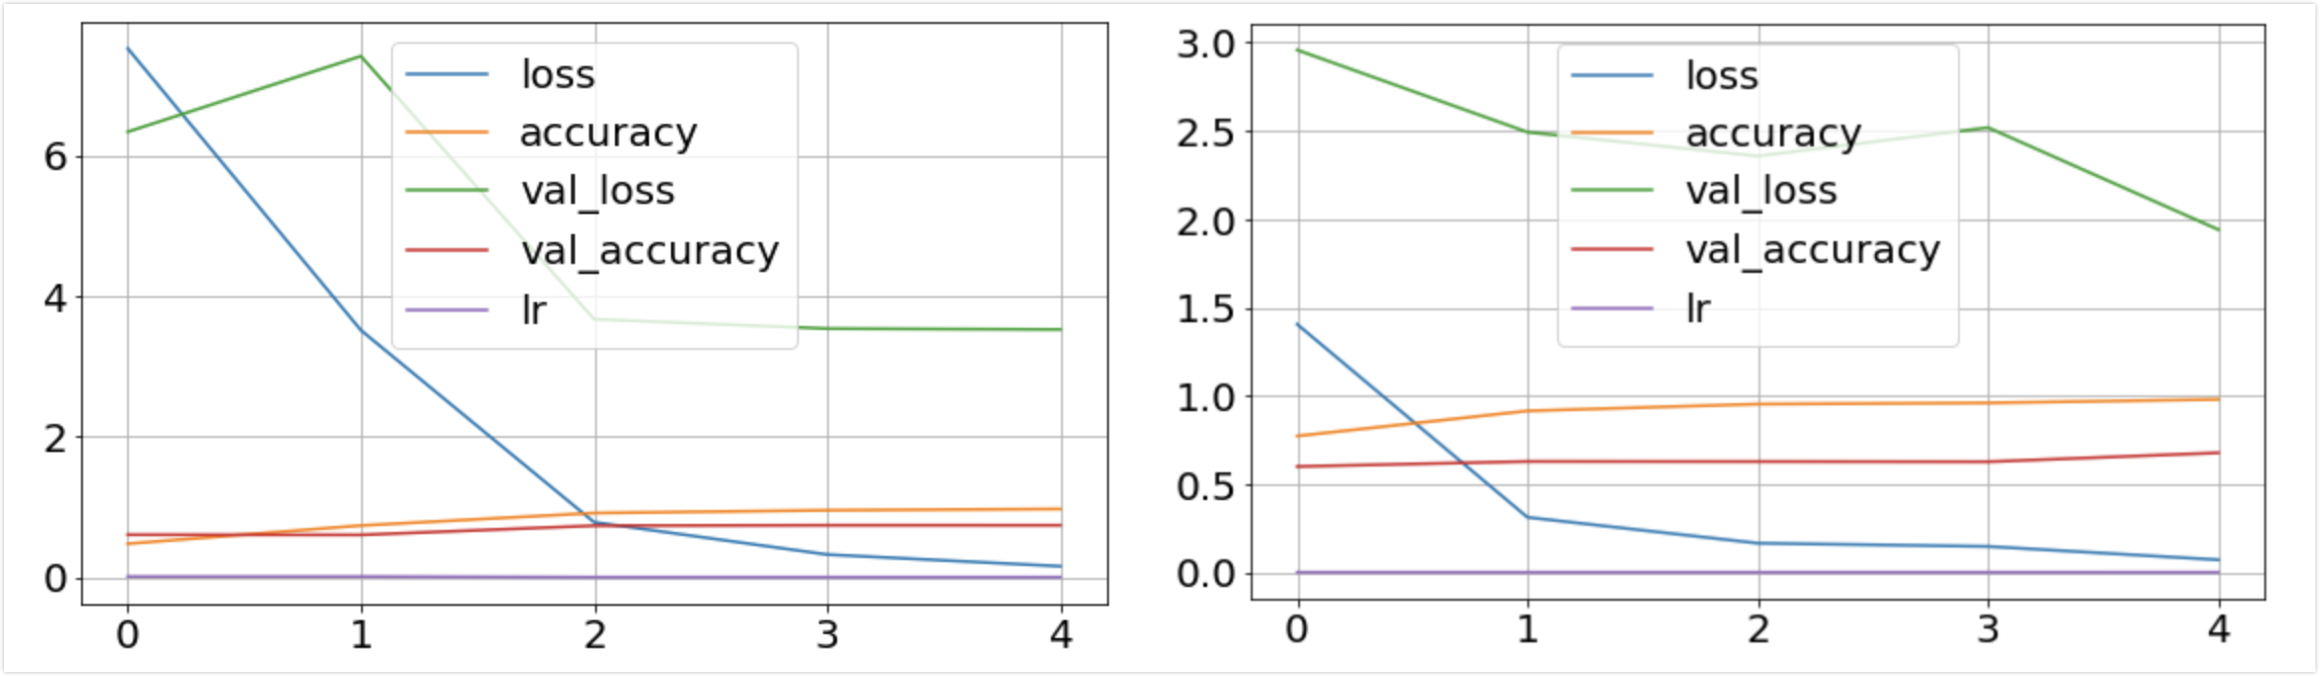

The accuracy of test data is 67.97%, and the loss of the test data is 1.9675. It's kind of similar to the result of validation accuracy and validation loss.

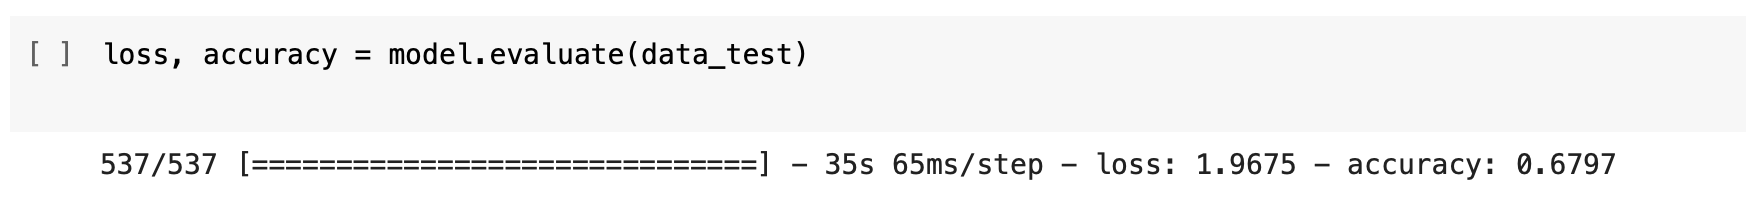